In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Upload the Dataset

In [2]:
data_path = 'water_potability.csv'
df = pd.read_csv(data_path)

Analyze the Dataset

In [3]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

First 5 Rows:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  22

Check Class Distribution:


Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


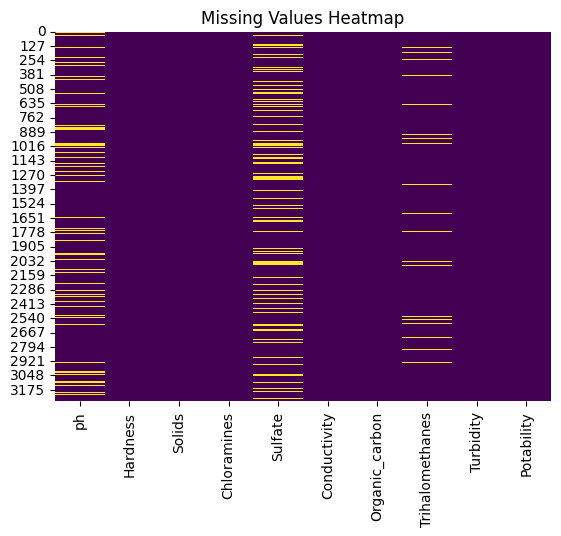

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Preprocess the Dataset

In [5]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nMissing Values After Imputation:")
print(df_imputed.isnull().sum())


Missing Values After Imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
import pandas as pd
import numpy as np

# Assuming the dataset is already loaded as df_imputed from your imputation step
# If not, reload it (adjust path if needed)
# df_imputed = pd.read_csv('water_potability_imputed.csv')

# Confirm no missing values (just to double-check)
print("Missing Values Check:")
print(df_imputed.isnull().sum())

Missing Values Check:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [8]:
print("\nClass Distribution Before Downsampling:")
print(df_imputed['Potability'].value_counts(normalize=True))


Class Distribution Before Downsampling:
Potability
0.0    0.60989
1.0    0.39011
Name: proportion, dtype: float64


In [9]:
# Separate features and target
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Downsample
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verify class distribution
print("\nClass Distribution After Downsampling:")
print(pd.Series(y_resampled).value_counts(normalize=True))


Class Distribution After Downsampling:
Potability
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (2044, 9)
Test Set Shape: (512, 9)


In [12]:
# Define models with tuned parameters for high accuracy
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Cross-validation
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest CV Accuracy: 0.6003 ± 0.0318
Gradient Boosting CV Accuracy: 0.5788 ± 0.0263
Logistic Regression CV Accuracy: 0.4789 ± 0.0197
SVM CV Accuracy: 0.6032 ± 0.0347
KNN CV Accuracy: 0.5763 ± 0.0137


Missing Values Check:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Class Distribution Before Downsampling:
Potability
0.0    0.60989
1.0    0.39011
Name: proportion, dtype: float64


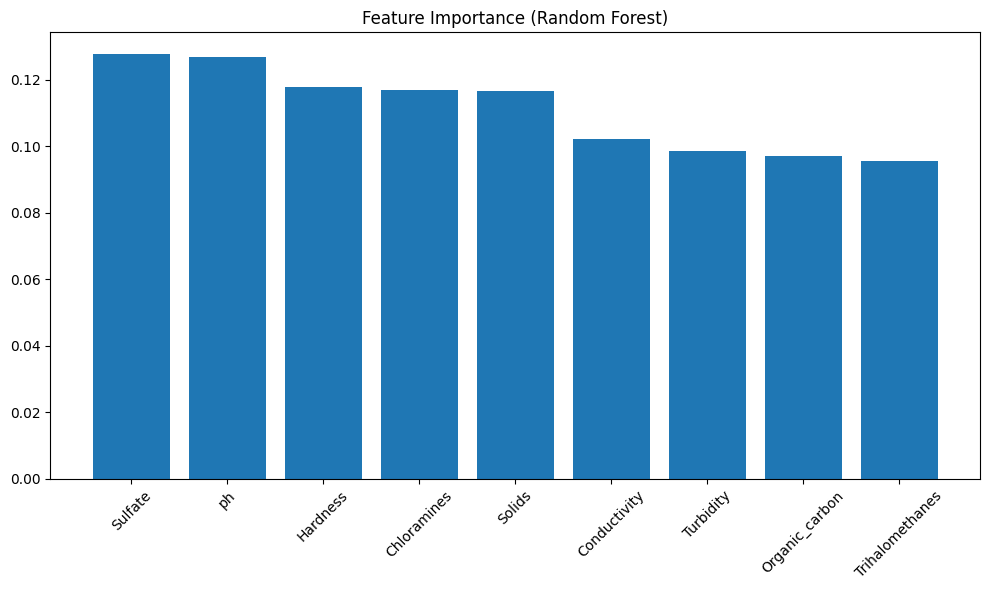

Feature Importance Scores:
Sulfate: 0.1279
ph: 0.1270
Hardness: 0.1178
Chloramines: 0.1170
Solids: 0.1167
Conductivity: 0.1023
Turbidity: 0.0987
Organic_carbon: 0.0971
Trihalomethanes: 0.0956

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest CV Accuracy: 0.6139867683014526
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting CV Accuracy: 0.589038304808476

Polynomial Features Training Set Shape: (2044, 45)
Polynomial Features Test Set Shape: (512, 45)

Random Forest (Polynomial Features):
Train Accuracy: 0.9995
Test Accuracy: 0.6230

Gradient Boosting (Polynomial Features):
Train Accuracy: 1.0000
Test Accuracy: 0.5977

Logistic Regression (Polynomial Features):
Train Accuracy: 0.6204
Test Accuracy: 0.6270

SVM (Polynomial Features):
Train Accuracy: 0.7187
Test Accuracy: 0.6328

KNN (Polynomial Features):
Train 

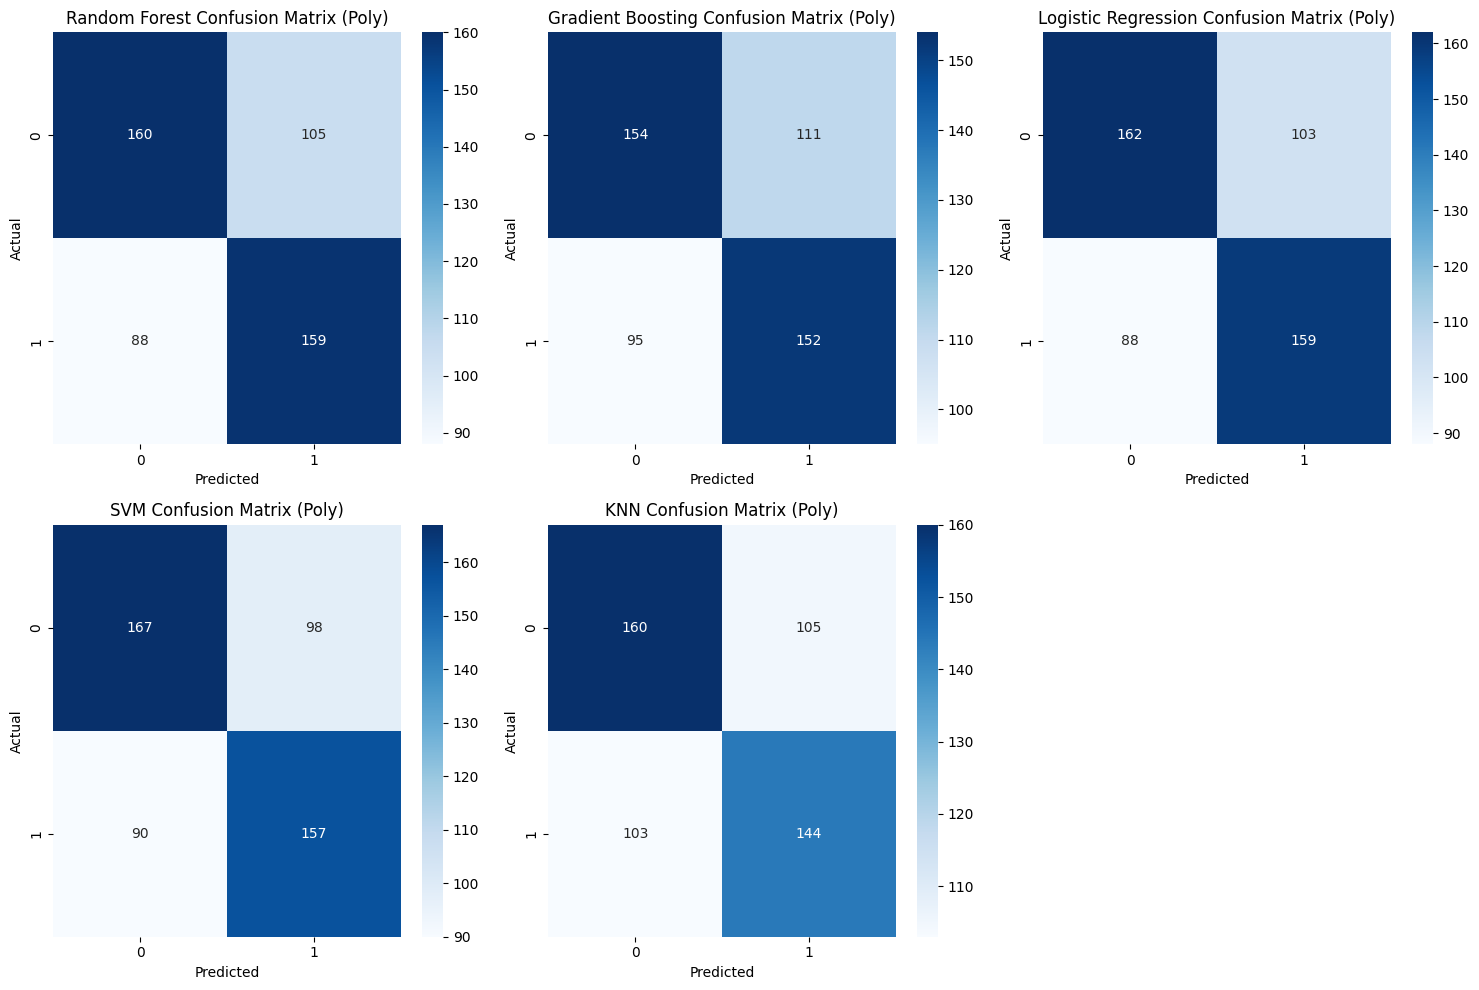

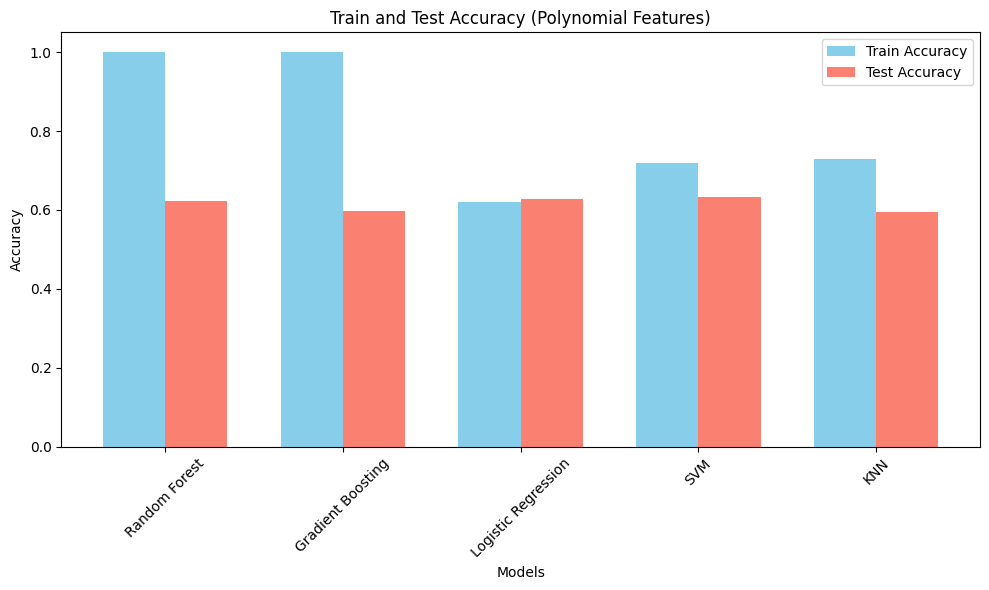


Class Distribution After SMOTE:
Potability
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Random Forest (SMOTE):
Train Accuracy: 0.9994
Test Accuracy: 0.7100

Gradient Boosting (SMOTE):
Train Accuracy: 0.9646
Test Accuracy: 0.6787

Logistic Regression (SMOTE):
Train Accuracy: 0.5250
Test Accuracy: 0.5225

SVM (SMOTE):
Train Accuracy: 0.7441
Test Accuracy: 0.6850

KNN (SMOTE):
Train Accuracy: 0.7772
Test Accuracy: 0.6550


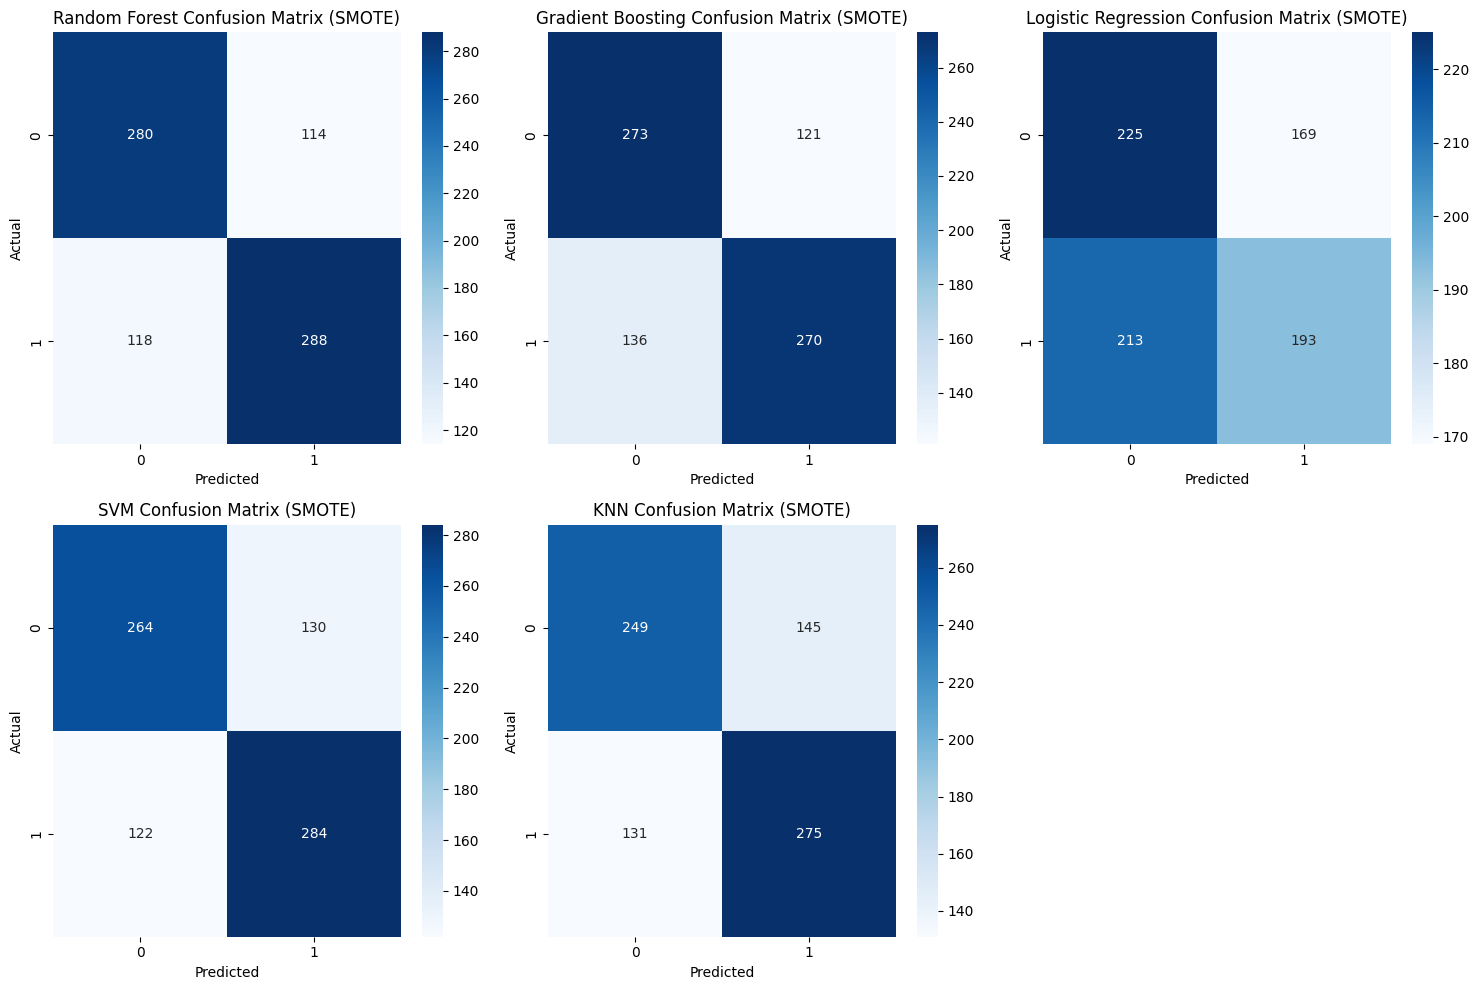

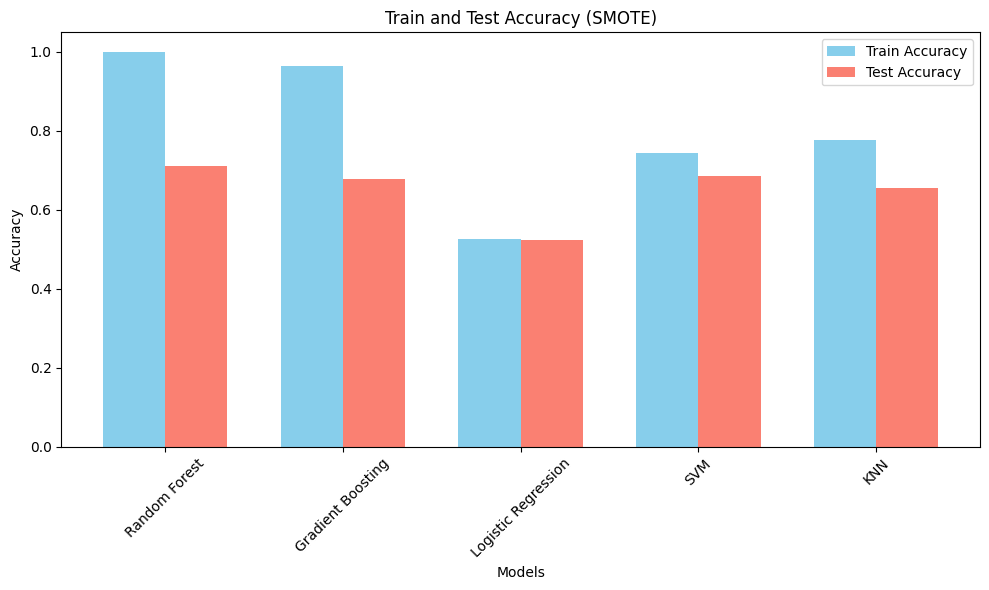

NameError: name 'files' is not defined

In [14]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# Step 1: Verify dataset (assuming df_imputed exists from your imputation)
print("Missing Values Check:")
print(df_imputed.isnull().sum())
print("\nClass Distribution Before Downsampling:")
print(df_imputed['Potability'].value_counts(normalize=True))

# Step 2: Feature Importance Analysis
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']
feature_names = X.columns
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()
print("Feature Importance Scores:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Step 3: Hyperparameter Tuning
# Define base models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Tune Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest CV Accuracy:", grid_search_rf.best_score_)
models['Random Forest'] = grid_search_rf.best_estimator_

# Tune Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting CV Accuracy:", grid_search_gb.best_score_)
models['Gradient Boosting'] = grid_search_gb.best_estimator_

# Step 4: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_resampled_poly = poly.fit_transform(X_resampled)
X_scaled_poly = scaler.fit_transform(X_resampled_poly)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_scaled_poly, y_resampled, test_size=0.2, random_state=42
)
print("\nPolynomial Features Training Set Shape:", X_train_poly.shape)
print("Polynomial Features Test Set Shape:", X_test_poly.shape)

# Evaluate with polynomial features
train_accuracies_poly = {}
test_accuracies_poly = {}
confusion_matrices_poly = {}
plt.figure(figsize=(15, 10))
for idx, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_poly, y_train_poly)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_acc = accuracy_score(y_train_poly, y_train_pred)
    test_acc = accuracy_score(y_test_poly, y_test_pred)
    train_accuracies_poly[name] = train_acc
    test_accuracies_poly[name] = test_acc
    print(f"\n{name} (Polynomial Features):")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    cm = confusion_matrix(y_test_poly, y_test_pred)
    confusion_matrices_poly[name] = cm
    plt.subplot(2, 3, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (Poly)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot accuracies (polynomial)
plt.figure(figsize=(10, 6))
model_names = list(models.keys())
train_acc_values_poly = [train_accuracies_poly[name] for name in model_names]
test_acc_values_poly = [test_accuracies_poly[name] for name in model_names]
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, train_acc_values_poly, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc_values_poly, width, label='Test Accuracy', color='salmon')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy (Polynomial Features)')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_smote).value_counts(normalize=True))
X_scaled_smote = scaler.fit_transform(X_smote)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_scaled_smote, y_smote, test_size=0.2, random_state=42
)

# Evaluate with SMOTE
train_accuracies_smote = {}
test_accuracies_smote = {}
confusion_matrices_smote = {}
plt.figure(figsize=(15, 10))
for idx, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_smote, y_train_smote)
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_smote)
    train_acc = accuracy_score(y_train_smote, y_train_pred)
    test_acc = accuracy_score(y_test_smote, y_test_pred)
    train_accuracies_smote[name] = train_acc
    test_accuracies_smote[name] = test_acc
    print(f"\n{name} (SMOTE):")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    cm = confusion_matrix(y_test_smote, y_test_pred)
    confusion_matrices_smote[name] = cm
    plt.subplot(2, 3, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (SMOTE)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot accuracies (SMOTE)
plt.figure(figsize=(10, 6))
train_acc_values_smote = [train_accuracies_smote[name] for name in model_names]
test_acc_values_smote = [test_accuracies_smote[name] for name in model_names]
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, train_acc_values_smote, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc_values_smote, width, label='Test Accuracy', color='salmon')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy (SMOTE)')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Missing Values Check:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Class Distribution Before SMOTE:
Potability
0.0    0.60989
1.0    0.39011
Name: proportion, dtype: float64

Class Distribution After SMOTE:
Potability
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Training Set Shape: (3196, 9)
Test Set Shape: (800, 9)

Top 5 Features:
ph: 0.1342
Solids: 0.1205
Sulfate: 0.1203
Hardness: 0.1148
Chloramines: 0.1131

Best Random Forest Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest CV Accuracy: 0.6789764280125196
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting CV Accuracy: 0.6639563771517997


C:\Users\kmvig\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best XGBoost CV Accuracy: 0.6673977895148671

Cross-Validation Accuracies (Selected Features):
Random Forest CV Accuracy: 0.6790 ± 0.0084
Gradient Boosting CV Accuracy: 0.6640 ± 0.0055


C:\Users\kmvig\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kmvig\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kmvig\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

XGBoost CV Accuracy: 0.6674 ± 0.0111
SVM CV Accuracy: 0.6564 ± 0.0113
KNN CV Accuracy: 0.6408 ± 0.0258
Stacking CV Accuracy: 0.6758 ± 0.0045

Random Forest:
Train Accuracy: 0.9161
Test Accuracy: 0.6787

Gradient Boosting:
Train Accuracy: 0.8570
Test Accuracy: 0.6700


C:\Users\kmvig\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:18:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Train Accuracy: 0.8223
Test Accuracy: 0.6550

SVM:
Train Accuracy: 0.6884
Test Accuracy: 0.6775

KNN:
Train Accuracy: 0.7753
Test Accuracy: 0.6500

Stacking:
Train Accuracy: 0.8683
Test Accuracy: 0.6900


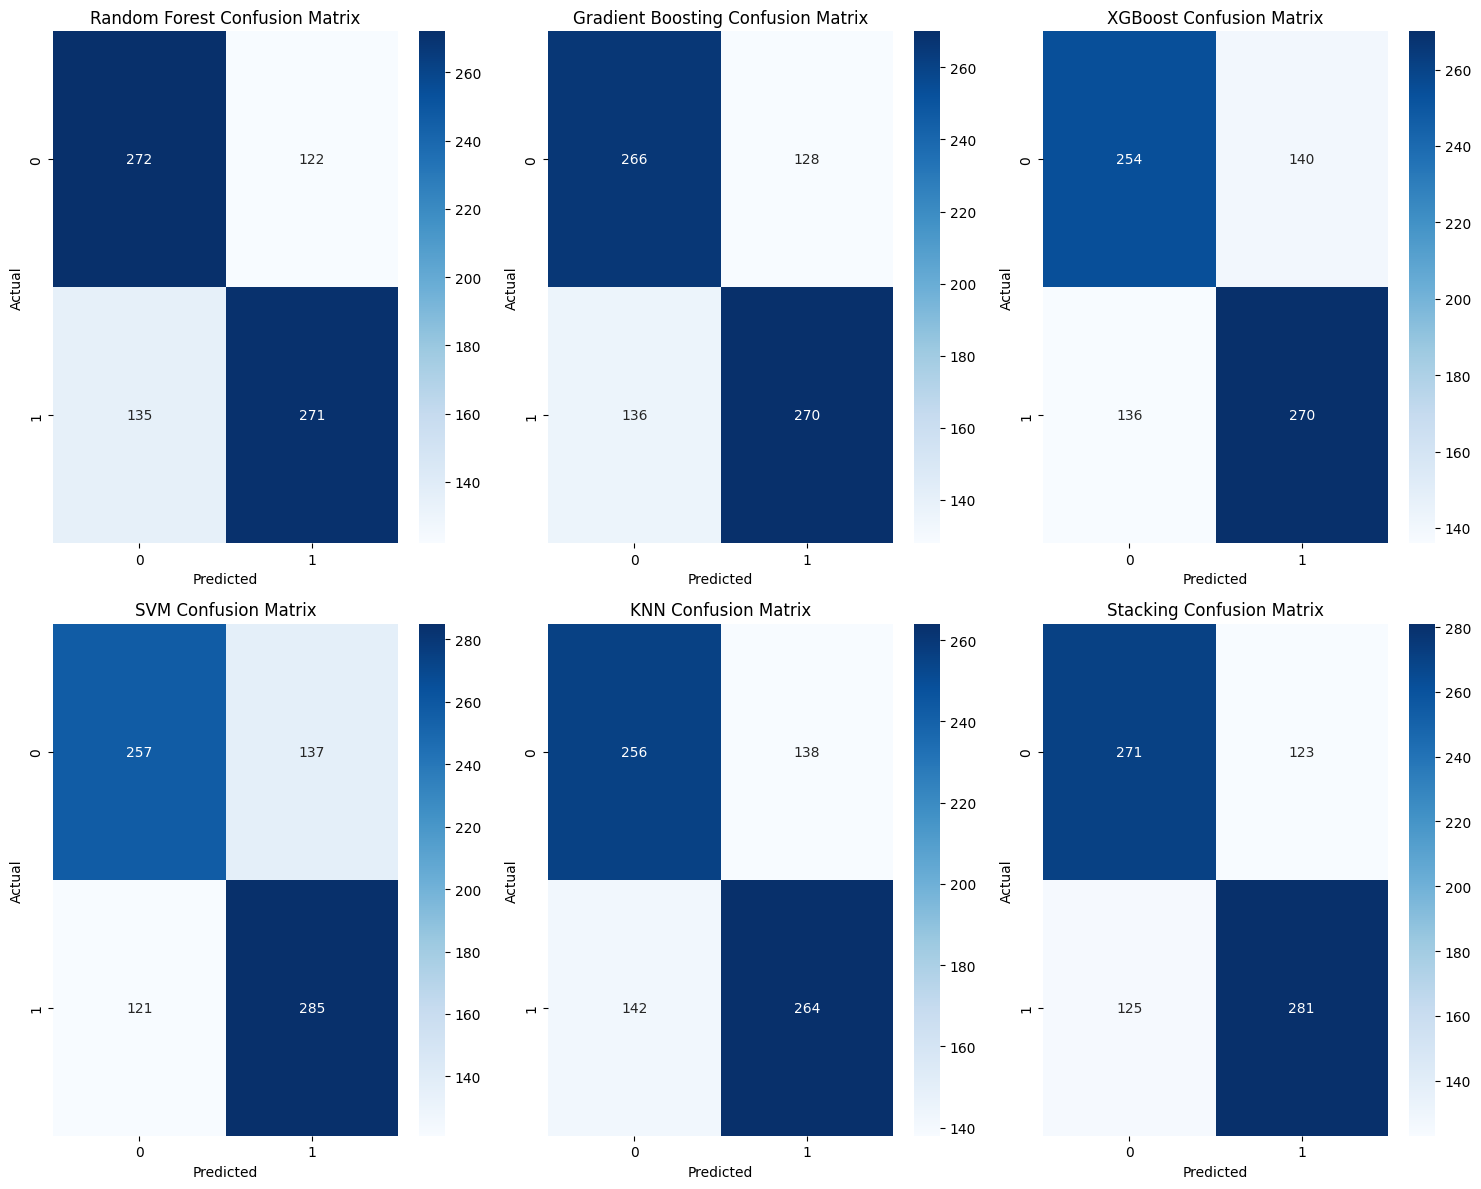

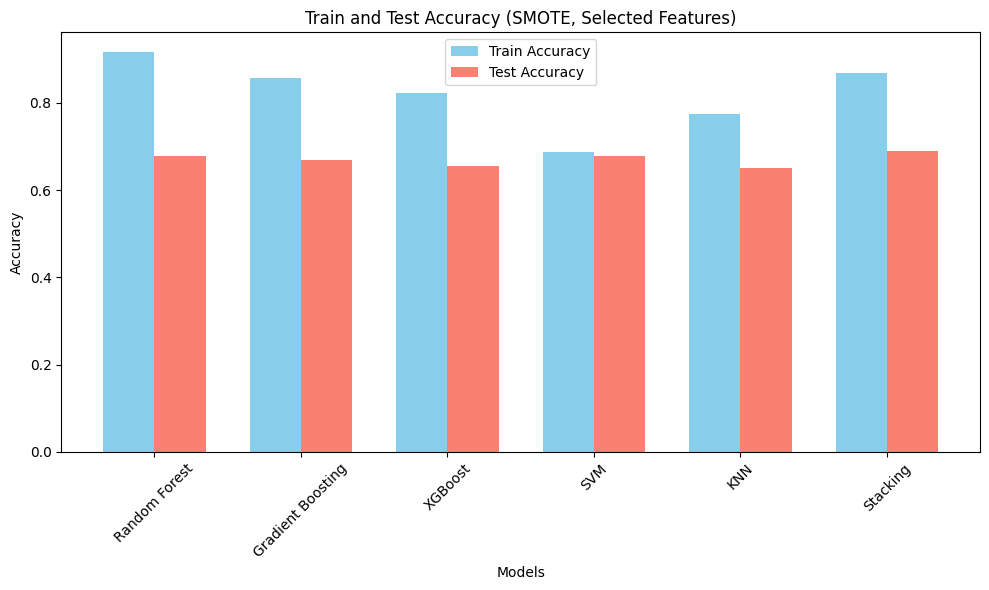

In [15]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Verify dataset
print("Missing Values Check:")
print(df_imputed.isnull().sum())
print("\nClass Distribution Before SMOTE:")
print(df_imputed['Potability'].value_counts(normalize=True))

# Step 2: Apply SMOTE
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_smote).value_counts(normalize=True))

# Scale features
scaler = StandardScaler()
X_scaled_smote = scaler.fit_transform(X_smote)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_smote, y_smote, test_size=0.2, random_state=42
)
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Step 3: Feature Selection
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
top_features = indices[:5]  # Select top 5 features
print("\nTop 5 Features:")
for i in top_features:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Update datasets with top features
X_train_selected = X_train[:, top_features]
X_test_selected = X_test[:, top_features]

# Step 4: Define and Tune Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Tune Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train)
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest CV Accuracy:", grid_search_rf.best_score_)
models['Random Forest'] = grid_search_rf.best_estimator_

# Tune Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train_selected, y_train)
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting CV Accuracy:", grid_search_gb.best_score_)
models['Gradient Boosting'] = grid_search_gb.best_estimator_

# Tune XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
                              param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_selected, y_train)
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("Best XGBoost CV Accuracy:", grid_search_xgb.best_score_)
models['XGBoost'] = grid_search_xgb.best_estimator_

# Step 5: Stacking Ensemble
estimators = [
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting']),
    ('svm', models['SVM'])
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
models['Stacking'] = stacking

# Step 6: Cross-Validation
print("\nCross-Validation Accuracies (Selected Features):")
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Step 7: Train and Evaluate
train_accuracies = {}
test_accuracies = {}
confusion_matrices = {}
plt.figure(figsize=(15, 12))
for idx, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc
    print(f"\n{name}:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[name] = cm
    plt.subplot(2, 3, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 8: Accuracy Plot
plt.figure(figsize=(10, 6))
model_names = list(models.keys())
train_acc_values = [train_accuracies[name] for name in model_names]
test_acc_values = [test_accuracies[name] for name in model_names]
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, train_acc_values, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc_values, width, label='Test Accuracy', color='salmon')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy (SMOTE, Selected Features)')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

